<a href="https://colab.research.google.com/github/OskarMyhreMidboe/DAT155/blob/master/DAT255_semesteroppgave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [167]:
!pip -q install torchxrayvision

In [168]:
from fastbook import *

import torchxrayvision as xrv
import matplotlib.pyplot as plt
import pandas as pd

In [169]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset

fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


In [170]:
d = xrv.datasets.COVID19_Dataset(imgpath="covid-chestxray-dataset/images/",csvpath="covid-chestxray-dataset/metafixed.csv")

In [171]:
sample = d[1]

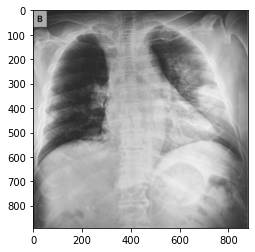

In [172]:
plt.imshow(sample["img"][0], cmap="gray");


In [173]:
data_df = pd.read_csv(d.csvpath)

In [174]:
data_df.head()
#Trenger : patientid, sex, age, finding, folder, img_id

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in...",NaN,NaN
4,4,0.0,F,52.0,Pneumoni

In [175]:
data_df.shape

#(antall bilder, antall parametre)

(929, 30)

In [176]:
#Lager ny dataframe med utvalgte 

final_df = data_df.filter(['patientid', 'sex', 'age', 'finding', 'filename','folder' ], axis=1)

In [177]:
final_df.head()

,patientid,sex,age,finding,filename,folder
0,2,M,65.0,Pneumonia/Viral/COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,images
1,2,M,65.0,Pneumonia/Viral/COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,images
2,2,M,65.0,Pneumonia/Viral/COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,images
3,2,M,65.0,Pneumonia/Viral/COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,images
4,4,F,52.0,Pneumonia/Viral/COVID-19,nejmc2001573_f1a.jpeg,images


In [178]:
np.unique(final_df.finding)

array(['No Finding', 'Pneumonia', 'Pneumonia/Aspiration', 'Pneumonia/Bacterial', 'Pneumonia/Bacterial/Chlamydophila', 'Pneumonia/Bacterial/E.Coli', 'Pneumonia/Bacterial/Klebsiella',
       'Pneumonia/Bacterial/Legionella', 'Pneumonia/Bacterial/Mycoplasma', 'Pneumonia/Bacterial/Nocardia', 'Pneumonia/Bacterial/Staphylococcus/MRSA', 'Pneumonia/Bacterial/Streptococcus',
       'Pneumonia/Fungal/Aspergillosis', 'Pneumonia/Fungal/Pneumocystis', 'Pneumonia/Lipoid', 'Pneumonia/Viral/COVID-19', 'Pneumonia/Viral/Herpes ', 'Pneumonia/Viral/Influenza',
       'Pneumonia/Viral/Influenza/H1N1', 'Pneumonia/Viral/MERS-CoV', 'Pneumonia/Viral/SARS', 'Pneumonia/Viral/Varicella', 'Tuberculosis', 'Unknown', 'todo'], dtype=object)

In [179]:
#Lager en categori som sier om pasienten er rammet av COVID eller ikke.
final_df['ctgry'] = "other"
final_df.loc[final_df.finding == "Pneumonia/Viral/COVID-19", 'ctgry'] = "covid"


In [180]:
df_ex = final_df.filter(['filename', 'ctgry'], axis=1)

In [181]:
final_df

,patientid,sex,age,finding,filename,folder,ctgry
0,2,M,65.0,Pneumonia/Viral/COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,images,covid
1,2,M,65.0,Pneumonia/Viral/COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,images,covid
2,2,M,65.0,Pneumonia/Viral/COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,images,covid
3,2,M,65.0,Pneumonia/Viral/COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,images,covid
4,4,F,52.0,Pneumonia/Viral/COVID-19,nejmc2001573_f1a.jpeg,images,covid
...,...,...,...,...,...,...,...
924,479,F,40.0,Pneumonia,072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg,images,other
925,479,F,40.0,Pneumonia,ff33c406392b968d483174c97eb857_jumbo-9.jpeg,images,other
926,480,M,26.0,Pneumonia,000001-266.jpg,images,other
927,481,M,50.0,Pneumonia,000001-272.jpg,images,other


In [182]:
from fastai.vision.all import *

In [183]:
df_ex.head()

,filename,ctgry
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,covid
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,covid
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,covid
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,covid
4,nejmc2001573_f1a.jpeg,covid


In [184]:
data = DataBlock(blocks = (ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_x = lambda x:str(d.imgpath)+f"{x[0]}",
                  splitter = RandomSplitter(),
                  get_y = lambda x:x[1],
                  batch_tfms = [Normalize.from_stats(*imagenet_stats)],
                  item_tfms = Resize(512)
                 )

In [185]:
data2 = DataBlock(blocks = (ImageBlock(cls=PILImageBW), CategoryBlock),
                  get_x = lambda x:str(d.imgpath)+f"{x[0]}",
                  splitter = RandomSplitter(),
                  get_y = lambda x:x[1],
                  batch_tfms = [Normalize.from_stats(*imagenet_stats)],
                  item_tfms = Resize(1024)
                 )

In [186]:
dls = data.dataloaders(df_ex.values, bs=20)

In [187]:
dls2 = data.dataloaders(df_ex.values, bs=20)

In [188]:
d.imgpath

'covid-chestxray-dataset/images/'

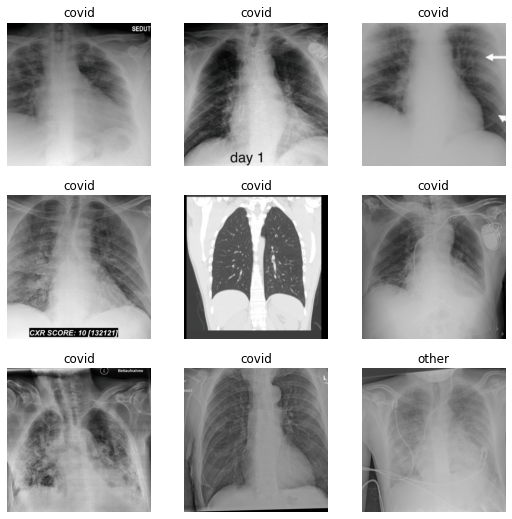

In [189]:
dls.show_batch()

In [190]:
#The CSV contained some misinformation on some files i deleted manually
#covid-chestxray-dataset/images/coronacases_org_002.nii.gz
#covid-chestxray-dataset/images/coronacases_org_001.nii.gz

In [191]:
learn = cnn_learner(dls, models.resnet34, metrics=[accuracy]).to_fp16()


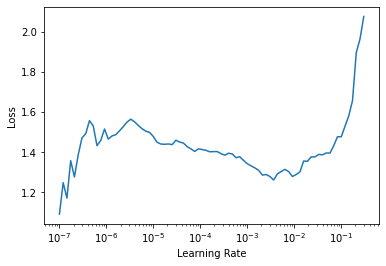

In [192]:
suggested_lr = learn.lr_find()


In [193]:
learn.freeze()
learn.fit_one_cycle(2, slice(suggested_lr.lr_steep, suggested_lr.lr_min))

epoch,train_loss,valid_loss,accuracy,time
0,1.196244,0.922270,0.643243,00:33
1,1.016824,0.685218,0.708108,00:32


In [194]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(suggested_lr.lr_steep, suggested_lr.lr_min))

epoch,train_loss,valid_loss,accuracy,time
0,0.861535,0.621375,0.751351,00:33
1,0.758349,0.555781,0.794595,00:33
2,0.643362,0.575419,0.751351,00:33


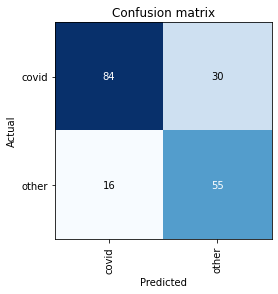

In [195]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

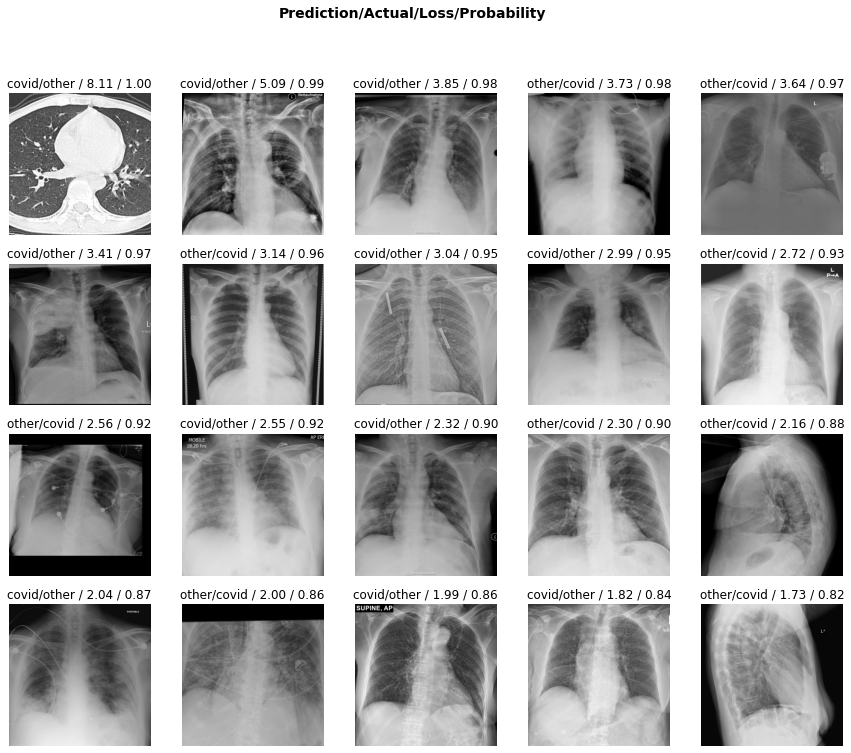

In [196]:
interp.plot_top_losses(20, nrows=4)

# Switching data to the larger pictures

In [197]:
learn.data = dls2

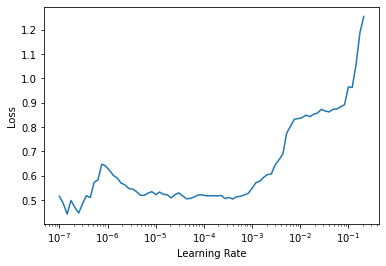

In [198]:
suggested_lr = learn.lr_find()


In [165]:
learn.fit_one_cycle(3, slice(suggested_lr.lr_steep, suggested_lr.lr_min))

epoch,train_loss,valid_loss,accuracy,time
0,0.257307,0.453053,0.864865,00:34
1,0.239665,0.447121,0.864865,00:33
2,0.212812,0.452932,0.864865,00:33


# Getting a final testset with unseen data to test our model

In [199]:
!pip install kaggle


In [200]:
from google.colab import files
files.upload()

{}

In [201]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [202]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [203]:
!ls

covid19-radiography-database.zip  files   kaggle.json
covid-chestxray-dataset		  gdrive  models


In [204]:
import zipfile
zip_ref = zipfile.ZipFile('covid19-radiography-database.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [205]:
learn.predict('/content/files/COVID-19_Radiography_Dataset/COVID/COVID-100.png')

('other', tensor(1), tensor([0.0962, 0.9038]))

In [206]:
import os
directory = '/content/files/COVID-19_Radiography_Dataset/COVID/'
results = []

for filename in os.listdir(directory):
    results.append(learn.predict(os.path.join(directory + filename)))

KeyboardInterrupt: ignored

In [207]:
results

[('covid', tensor(0), tensor([0.9337, 0.0663])),
 ('other', tensor(1), tensor([0.0708, 0.9292])),
 ('covid', tensor(0), tensor([0.9925, 0.0075])),
 ('covid', tensor(0), tensor([0.8690, 0.1310])),
 ('other', tensor(1), tensor([0.3769, 0.6231])),
 ('other', tensor(1), tensor([0.3659, 0.6341])),
 ('other', tensor(1), tensor([0.0986, 0.9014])),
 ('other', tensor(1), tensor([0.0215, 0.9785])),
 ('covid', tensor(0), tensor([0.8132, 0.1868])),
 ('other', tensor(1), tensor([0.0066, 0.9934])),
 ('other', tensor(1), tensor([0.0577, 0.9423])),
 ('covid', tensor(0), tensor([0.5943, 0.4057])),
 ('other', tensor(1), tensor([0.3952, 0.6048])),
 ('other', tensor(1), tensor([0.1535, 0.8465])),
 ('covid', tensor(0), tensor([0.9328, 0.0672])),
 ('other', tensor(1), tensor([0.0384, 0.9616])),
 ('other', tensor(1), tensor([0.1018, 0.8982])),
 ('other', tensor(1), tensor([0.3962, 0.6038])),
 ('other', tensor(1), tensor([0.4441, 0.5559])),
 ('other', tensor(1), tensor([0.3472, 0.6528])),
 ('covid', tensor(0)

#As we can see my model is not performing very well.

In [ ]:
coviddata = pd.read_excel('/content/files/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
viralpndata = pd.read_excel('/content/files/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx')
normaldata = pd.read_excel('/content/files/COVID-19_Radiography_Dataset/Normal.metadata.xlsx')

In [ ]:
finaldata = coviddata.append(viralpndata).append(normaldata)

In [ ]:
finaldata.reset_index()

# If i had more time i would try to train my model on the other dataset